In [98]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [72]:
ORIG_DATA_DIR = "data/"

In [73]:
# Merges original data (excluding metadata)
sales_data = pd.DataFrame()

for data_file in os.listdir(ORIG_DATA_DIR):
    temp = pd.read_csv(ORIG_DATA_DIR + data_file)
    # Strip off header row and remove redundant columns
    temp = temp.iloc[1:, [1, 4, 5, 8]]
    sales_data = sales_data.append(temp)


# Rename columns
sales_data.columns = ["Zipcode",  "Industry",  "SalesId", "NumEstablishments"]

# Typecast number strings into numeric dtype
sales_data.SalesId = pd.to_numeric(sales_data.SalesId)
sales_data.NumEstablishments = pd.to_numeric(sales_data.NumEstablishments)
sales_data.Zipcode = pd.to_numeric(sales_data.Zipcode)

/Users/collin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
sales_data.dtypes

Zipcode               int64
Industry             object
SalesId               int64
NumEstablishments     int64
dtype: object

In [8]:
sales_data["SalesId"].unique()

array(['All establishments',
       'Establishments operated for the entire year',
       'Establishments operated entire year with sales/receipts/revenue less than $100,000',
       'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999',
       'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999',
       'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999',
       'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more',
       'Establishments not operated for the entire year'], dtype=object)

In [76]:
# bracket1 = "Establishments operated entire year with sales/receipts/revenue less than $100,000"
# bracket2 = "Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999"
# bracket3 = "Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999"
# bracket4 = "Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999"
# bracket5 = "Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more"
bracket1 = 114
bracket2 = 123
bracket3 = 125
bracket4 = 131
bracket5 = 132

def map_to_numeric(x):
    if (x == bracket1):
        return 50000
    elif (x == bracket2):
        return 175000
    elif (x == bracket3):
        return 375000
    elif (x == bracket4):
        return 750000
    elif (x == bracket5):
        return 1500000
    else:
        return 0

In [77]:
sales_data = sales_data[sales_data["Industry"] == "New car dealers"]

In [78]:
sales_data["SalesIdVal"] = sales_data["SalesId"].apply(map_to_numeric)

sales_data["Sales"] = sales_data["SalesIdVal"] * sales_data["NumEstablishments"]

/Users/collin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/collin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
sales_data = sales_data[sales_data["Sales"] > 0]

In [81]:
sales_data = sales_data.groupby(["Zipcode"]).sum()

In [82]:
sales_data

,SalesId,NumEstablishments,SalesIdVal,Sales
Zipcode,,,,
1001,264,4,3000000,6000000
1002,264,2,3000000,3000000
1020,264,8,3000000,12000000
1027,264,2,3000000,3000000
1040,264,2,3000000,3000000
1041,264,2,3000000,3000000
1060,264,12,3000000,18000000
1069,526,4,4500000,4500000
1082,264,2,3000000,3000000


In [110]:
y = sales_data["Sales"]
X = sales_data.drop(["Sales", "SalesId"], axis=1)

model1 = sm.OLS(y, X).fit()
print(model1.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.867e+05
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:02:41   Log-Likelihood:            -1.1243e+05
No. Observations:                7374   AIC:                         2.249e+05
Df Residuals:                    7372   BIC:                         2.249e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NumEstablishments  1.466e+06   2476.66

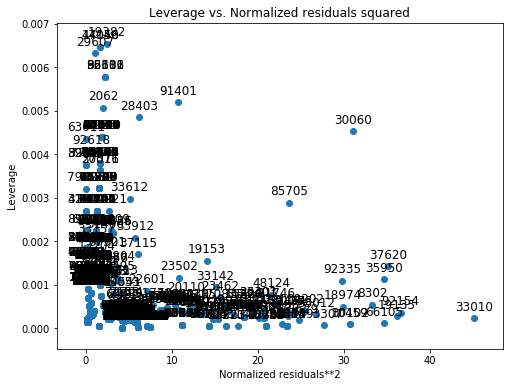

In [111]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model1, ax = ax)

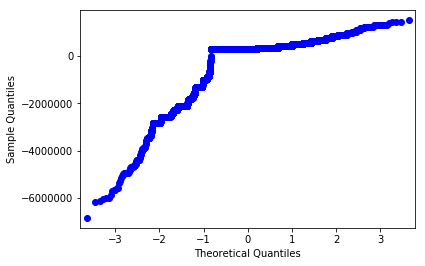

In [112]:
fig = sm.qqplot(model1.resid)
plt.show()

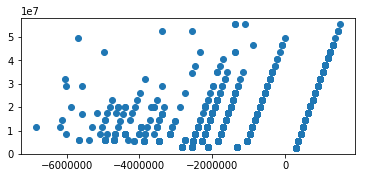

In [113]:
pred_val = model1.predict(X)

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(model1.resid, pred_val)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")